<a href="https://colab.research.google.com/github/MohammadrezaTale/Digikala-sentiment-analysis/blob/master/Sentiment_Analysis_(3_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import classification_report

In [3]:
!gdown --id 1iC_2Bfnw2xp7x5xod4TfU6zUL8JYjkRM

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iC_2Bfnw2xp7x5xod4TfU6zUL8JYjkRM
To: /content/100k digikala.xlsx
100% 19.7M/19.7M [00:00<00:00, 30.8MB/s]


In [4]:
df = pd.read_excel('100k digikala.xlsx')

In [5]:
df.shape

(100000, 12)

In [6]:
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [7]:
df.drop(['product_title','title_en','user_id','verification_status','title','advantages','disadvantages','product_id','likes','dislikes'], axis=1 ,inplace=True)

In [8]:
df.head()

,recommend,comment
0,\N,واقعا عالیه. من که ازش خیلی راضیم
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
2,not_recommended,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...
3,no_idea,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...
4,no_idea,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...


In [9]:
df['recommend'].value_counts()

recommended        36972
\N                 36382
not_recommended    16110
no_idea            10536
Name: recommend, dtype: int64

In [10]:
df = df[(df['recommend'] =='recommended') | (df['recommend'] == 'not_recommended') | (df['recommend'] == 'no_idea') ]

In [11]:
df['recommend'].value_counts()

recommended        36972
not_recommended    16110
no_idea            10536
Name: recommend, dtype: int64

In [12]:
df.head()

,recommend,comment
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
2,not_recommended,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...
3,no_idea,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...
4,no_idea,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...
5,recommended,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...


In [13]:
df = df.dropna()

In [14]:
df.describe()

,recommend,comment
count,63586,63586
unique,3,61359
top,recommended,عالی
freq,36960,155


In [15]:
df.head()

,recommend,comment
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
2,not_recommended,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...
3,no_idea,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...
4,no_idea,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...
5,recommended,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...


<BarContainer object of 3 artists>

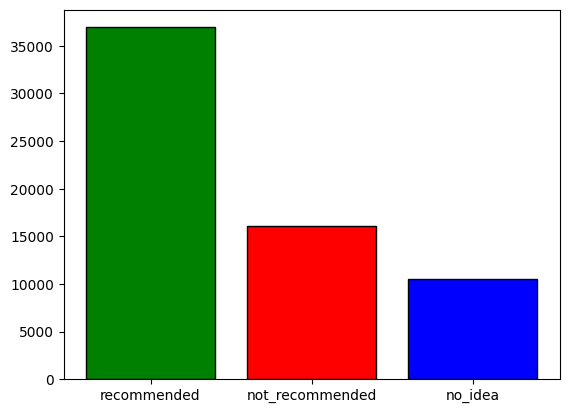

In [17]:
plt.bar(['recommended','not_recommended', 'no_idea'], df['recommend'].value_counts(),color=['green','red', 'blue'],edgecolor='black')

In [ ]:
#hazm
!pip install hazm
from hazm import *

In [19]:
stemmer = Stemmer()
lemma = Lemmatizer()
normalizer = Normalizer()

In [20]:
stopword = stopwords_list()
unwanted_num = {'ندارد','نباید','عدم','دارای','خیلی','خاص','اما','زیاد','هستند','عالی','نیستند','نبود','نمی شود', 'است', 'می شود', 'شد', 'شده', 'بود' ,'نیست', 'خوبی', 'خوب' ,'بهترین', 'بهتر', 'متاسفانه'}
stopwords = [item for item in stopword if item not in unwanted_num]

In [ ]:
stopword

In [22]:
def preprocess(review_text):
  review_text = re.sub('https\S+','',review_text)
  review_text = re.sub('[a-zA-z]','',review_text)
  review_text = re.sub(r'[!”#$%&’()*٪+,-/:;<=>?@[\]^_`{|}~0-9۱۲۳۴۵۶۷۸۹۰]','',review_text)
  review_text = re.sub(r'[\s]{2,}', ' ',review_text)
  review_text = re.sub(r'(\w)\1{2,}', r'\1',review_text)
  review_text = normalizer.normalize(review_text)
  # review_text = sent_tokenize(review_text)
  review_text = word_tokenize(review_text)
  review_text = [item for item in review_text if item not in stopwords]
  review_text = [stemmer.stem(i) for i in review_text]
  review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
  review_text = [i for i in review_text if len(i) > 1]
  review_text = ' '.join(review_text)
  if re.search(r'[\u0600-\u06FF]', review_text):
    return review_text
  else:
    return None

In [23]:
tqdm.pandas()

In [24]:
df.isnull().sum()

recommend    0
comment      0
dtype: int64

In [25]:
df = df.iloc[:20000, :]

<BarContainer object of 3 artists>

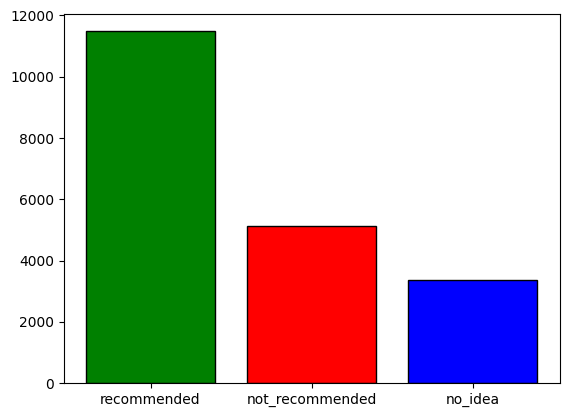

In [26]:
plt.bar(['recommended','not_recommended', 'no_idea'], df['recommend'].value_counts(),color=['green','red', 'blue'],edgecolor='black')

In [27]:
df['CleanText'] = df['comment'].progress_apply(preprocess)

100%|██████████| 20000/20000 [00:24<00:00, 817.93it/s]


In [28]:
df.isnull().sum()

recommend     0
comment       0
CleanText    15
dtype: int64

In [29]:
df = df.dropna()

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df['recommend'] = label_encoder.fit_transform(df['recommend'])
# 2 = recommended 1= not_recommended 0=no_idea

<ipython-input-30-7b8e92ee7680>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recommend'] = label_encoder.fit_transform(df['recommend'])


In [31]:
df.iloc[20:50:5,:]

,recommend,comment,CleanText
31,1,با سلام من این محصولو یه هفته پیش خریدم و کم...,سلا محصولو یه هفته خرید ساع دس طراح واقعا گو ر...
36,2,عالی و رضایت بخش بدون هیچ مشکلی,عال رضایت‌بخ مشکل
41,2,در هنگام پیاده روی وقتی تو جیبتونه و یا تو دست...,پیاده‌رو جیبتونه دستتون نگهداشتین مواقع قطع وص...
53,2,دو ساله دارم مرتب استفاده می کنم روزای اول چند...,دار مرتب استفاده روزا هنگ آپد نرم‌افزار خوب شد...
61,2,بعضی از سیستم عامل ها ممکن هست که با مانیتور ع...,سیستم‌عامل هس مانیتور عریض هماهنگ نباشند صور ف...
66,1,خریدمش ولی یکبار هم ازش استفاده نکردم.. خراب ب...,خرید یکبار از استفاده نکرد خراب بود راض نیس


In [32]:
df['recommend'].value_counts()

2    11481
1     5137
0     3367
Name: recommend, dtype: int64

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=2, max_features= 15000)
X_tfidf = tf.fit_transform(df['CleanText']).todense()

In [34]:
labels = df['recommend'].values

In [35]:
X_tfidf = np.squeeze(np.asarray(X_tfidf))

In [36]:
#balancing
from imblearn.over_sampling import SMOTE

# X is your text data and y is the corresponding labels
smote = SMOTE()
X, y = smote.fit_resample(X_tfidf, labels)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ade74dd1ea0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27554, 8522), (6889, 8522), (27554,), (6889,))

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
del X_tfidf

In [42]:
del X

In [43]:
# params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
#           'fit_prior': [True, False],
#          }

# nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# nb_grid.fit(X_train,y_train)

# print('Best Parameters : {}'.format(nb_grid.best_params_))
# print('Best Accuracy Through Grid Search : {:.3f}\n'.format(nb_grid.best_score_))

In [44]:
from time import perf_counter
start_tra = perf_counter()

NB = MultinomialNB(alpha=0.01, fit_prior= False)
NB.fit(X_train,y_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))


score = NB.score(X_test, y_test)
print("Accuracy:", score)
y_pred_NB = NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

train phase time:  1.1
Accuracy: 0.7596167803745101
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2297
           1       0.82      0.82      0.82      2253
           2       0.76      0.75      0.75      2339

    accuracy                           0.76      6889
   macro avg       0.76      0.76      0.76      6889
weighted avg       0.76      0.76      0.76      6889



In [47]:
# Naive Bayes
X_pred = tf.transform([preprocess('تجربه خرید من تا حالا فوق العاده بوده')]).todense()
X_pred = np.asarray(X_pred)
y_new = NB.predict(X_pred)
if y_new[0] == 2:
  print('Positive')
elif y_new[0] == 1:
  print('Negative')
else:
    print('neutral')

Positive
